# Unsupervised Learning

* **Disciplines:** Unsupervised Learning, dimensionality reduction and recommender systems.
* **Data:** Movies rated by users (https://grouplens.org/datasets/movielens/)

> F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. <https://doi.org/10.1145/2827872>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer, KNNImputer

## Load, clean and wrangle data

In [3]:
df_movies = pd.read_csv('../data/ml-latest-small/movies.csv', index_col='movieId')

In [4]:
df_movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [5]:
df_raitings = pd.read_csv('../data/ml-latest-small/ratings.csv')
df_raitings.rename(columns={'rating':'raiting'}, inplace=True)

In [6]:
df_raitings = df_raitings.merge(df_movies['title'], on='movieId')

In [7]:
# filter for movies that have at minimum N raitings
min_raiting_count = 20
# https://stackoverflow.com/a/29791952
df_raitings['raiting_count_per_movie'] = df_raitings.groupby('movieId')['movieId'].transform('count')
df_raitings = df_raitings[df_raitings.raiting_count_per_movie > min_raiting_count]

In [8]:
df_raitings.head()

,userId,movieId,raiting,timestamp,title,raiting_count_per_movie
0,1,1,4.0,964982703,Toy Story (1995),215
1,5,1,4.0,847434962,Toy Story (1995),215
2,7,1,4.5,1106635946,Toy Story (1995),215
3,15,1,2.5,1510577970,Toy Story (1995),215
4,17,1,4.5,1305696483,Toy Story (1995),215


* *https://stackoverflow.com/a/39358924*
* *https://stackoverflow.com/q/45312377*

In [9]:
M_movie_genres = df_movies.genres.str.get_dummies().drop('(no genres listed)', axis=1)
M_movie_genres.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,
1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
M_raitings = df_raitings.pivot(columns='title', values='raiting').dropna(how='all')
M_raitings

title,(500) Days of Summer (2009),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),13 Going on 30 (2004),"13th Warrior, The (1999)",1408 (2007),2001: A Space Odyssey (1968),2012 (2009),...,Young Frankenstein (1974),Young Guns (1988),Zack and Miri Make a Porno (2008),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Towards Non-negative matrix factorization

Using dimensionality reduction (PCA, Principal Component Analysis) as preprocessing.

### Principal Component Analysis (PCA) of user raiting matrix

(*Wikipedia states: "(...) it can be shown that the principal components are eigenvectors of the data's covariance matrix."*)

* Before applying PCA, it is often a good idea to remove mean and normalize variance of each dimension. In this case we omit this step, because each dimension (movie) has a fixed and meaningful value range of [0,5]. StandardScaler would be contraproductive, because a raiting value in for one movie would be transformed differently than the same raiting value for another movie.
* PCA (and NMF) cannot handle missing values (NaN). Therefore we need to apply imputation. The number of missing values and therefore imputation is quite significant in this example. This should be kept in mind.

In [ ]:
KNNImputer().fit_transform(M_raitings)

In [31]:
pca = PCA().fit(M_movie_genres)

In [33]:
W = pca.transform(M_movie_genres)

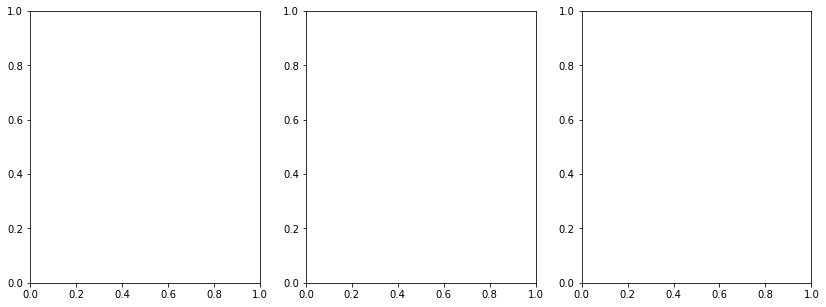

In [43]:
fig, ax = plt.subplots(ncols=3, figsize=(14,5))
